In [1]:
import pandas as pd
import numpy as np
import gc

from scipy import stats
from matplotlib import pyplot as plt

In [2]:
def csv_read(p_path,header_is=0):
    pd_data=pd.read_csv(p_path, sep=',',header=header_is)
    column_names=pd_data.columns.values.tolist()
    print(column_names)
    return pd_data,np.array(pd_data),column_names

#-------------------------------------------------------------------------------------
def write_to_csv(p_data,p_path):
    dataframe = pd.DataFrame(p_data)
    dataframe.to_csv(p_path, mode='a',header=False,index=False,sep=',')
    del dataframe
    gc.collect()
    
#-------------------------------------------------------------------------------------
def bar_figure(group1,group2,y_label):
    figure,axes=plt.subplots()
    
    axes.boxplot([group1,group2],patch_artist=True)
    plt.xticks(range(1,3),['Group 1','Group 2'])
    #plt.yticks(fontsize = 20)
    
    min_end=min(np.min(group1),np.min(group2))
    max_end=max(np.max(group1),np.max(group2))
    end=(max_end-min_end)/10
    plt.ylim(min_end-end,max_end+end)
    plt.ylabel(y_label)
    plt.show()

#-------------------------------------------------------------------------------------
def statistic_analysis(group1, group2):
    var_same=stats.levene(group1, group2)
    
    print("\n")
    print("-"*80)
    
    print("var_same",var_same)

    if var_same[1]>0.05:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=True)
        print("Test: f_t, p_value_t", format(f_t,'.3E'), format(p_value_t,'.3E'))
    else:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=False)
        print("Test: f_t, p_value_t",format(f_t,'.3E'), format(p_value_t,'.3E'))
    
    f, p_value = stats.f_oneway(group1, group2)
    print("ANOVA: f, p_value:",format(f,'.3E'), format(p_value_t,'.3E'))
    print("-"*80)
    print("\n")

In [3]:
data,data_arr,column_names=csv_read('./data/survival_data_filtered_3.csv')
column_names_arr=np.array(column_names)

FS_data,FS_data_arr,_=csv_read('./feature_selection.csv',header_is=None)

['NACCREAS', 'NACCREFR', 'BIRTHMO', 'BIRTHYR', 'SEX', 'HISPANIC', 'HISPOR', 'RACE', 'RACESEC', 'RACETER', 'PRIMLANG', 'EDUC', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'NACCFADM', 'NACCFFTD', 'MEMORY', 'ORIENT', 'JUDGMENT', 'COMMUN', 'HOMEHOBB', 'PERSCARE', 'CDRSUM', 'DECSUB', 'DECIN', 'COGMEM', 'COGJUDG', 'COGLANG', 'COGVIS', 'COGATTN', 'COGOTHR', 'NACCCOGF', 'COGMODE', 'DECAGE', 'BEAPATHY', 'BEDEP', 'BEVHALL', 'BEAHALL', 'BEDEL', 'BEDISIN', 'BEIRRIT', 'BEAGIT', 'BEPERCH', 'BEOTHR', 'NACCBEHF', 'BEMODE', 'MOGAIT', 'MOFALLS', 'MOTREM', 'MOSLOW', 'NACCMOTF', 'MOMODE', 'COURSE', 'FRSTCHG', 'NORMCOG', 'DEMENTED', 'NACCPPA', 'NACCBVFT', 'NACCLBDS', 'NACCTMCI', 'NACCMCIL', 'NACCMCIA', 'NACCMCIE', 'NACCMCIV', 'NACCMCII', 'IMPNOMCI', 'NACCALZD', 'NACCALZP', 'NACCLBDE', 'NACCLBDP', 'PARK', 'PSP', 'PSPIF', 'CORT', 'CORTIF', 'DOWNS', 'DOWNSIF', 'HUNT', 'HUNTIF', 'PRION', 'PRIONIF', 'BRNINJ', 'BRNINJIF', 'HYCEPH', 'HYCEPHIF', 'NEOP', 'NEOPIF', 'DEP', 'DEPIF', 'OTHPSY', 'OTHPSYIF',

In [4]:
used_number_features=10
FS_data_used=FS_data_arr[-1,0:used_number_features]

Feature:  NACCAGEB


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.015607323022519404, pvalue=0.900623590463963)
Test: f_t, p_value_t -2.329E+00 2.019E-02
ANOVA: f, p_value: 5.426E+00 2.019E-02
--------------------------------------------------------------------------------


Group1:  [79 58 76 59 77 86 60 74 76 71 50 80 61 72 64 61 29 72 61 72 60 89 68 68
 72 70 83 83 61 75 66 85 50 65 63 91 51 93 73 72 71 72 70 59 76 57 71 71
 47 78 67 65 75 57 64 61 88 65 75 69 58 85 35 57 82 73 70 59 70 74 60 56
 59 63 82 55 73 72 58 54 56 70 77 59 68 73 88 69 86 58 75 80 59 75 71 67
 47 57 74 71 60 66 74 93 67 66 75 75 78 75 71 79 67 80 59 90 79 63 60 77
 62 57 53 80 65 61 59 71 48 28 73 75 63 75 66 65 67 67 64 68 76 66 78 72
 62 69 56 67 73 77 87 70 92 61 86 68 73 64 60 70 57 86 62 59 78 28 82 68
 87 56 62 68 66 55 63 79 78 67 56 69 90 75 57 46 79 55 68 75 58 82 75 66
 78 78 59 68 74 76 83 60 68 82 61 60 60 65 80 67 66 70 67 54 

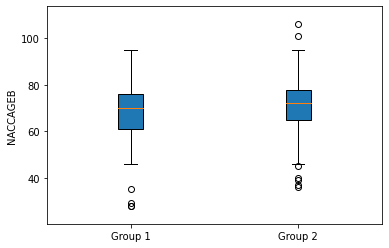

************************************************************************************************************************




Feature:  NACCAGE


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.5595734292501234, pvalue=0.4547406814483109)
Test: f_t, p_value_t -1.887E+00 5.961E-02
ANOVA: f, p_value: 3.562E+00 5.961E-02
--------------------------------------------------------------------------------


Group1:  [84 59 81 60 80 93 61 81 80 74 51 83 65 83 70 73 34 73 63 76 61 93 70 68
 77 74 92 88 63 76 68 89 51 70 66 97 54 100 83 83 81 82 75 63 81 59 76 76
 51 81 69 67 78 59 68 64 93 72 83 71 66 88 42 58 86 82 80 61 77 79 63 60
 61 69 86 59 74 76 63 56 57 78 80 61 71 83 90 75 87 63 81 83 66 85 73 68
 50 59 76 72 62 71 78 94 69 76 81 80 82 78 74 80 71 87 64 96 83 64 61 79
 66 59 54 84 69 65 61 73 49 35 78 80 64 81 68 66 69 68 66 70 84 70 88 78
 67 79 60 68 76 81 91 76 95 65 89 75 85 67 65 74 62 87 66 62 79 38 85 71
 89 57 63 

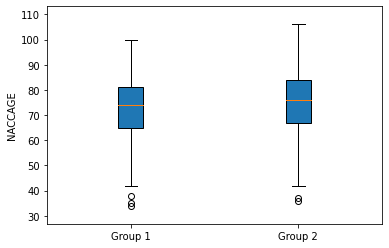

************************************************************************************************************************




Feature:  NACCIDEM


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=10.955950788155826, pvalue=0.0009919731179781662)
Test: f_t, p_value_t 3.264E+00 1.172E-03
ANOVA: f, p_value: 1.096E+01 1.172E-03
--------------------------------------------------------------------------------


Group1:  [8 8 8 8 8 1 8 1 1 8 8 8 1 1 8 1 1 8 8 8 8 8 8 8 1 8 1 1 8 8 8 8 8 8 8 1 8
 1 8 1 1 1 8 8 8 8 8 8 8 8 8 1 8 8 8 8 1 8 1 8 8 8 1 8 8 1 1 8 8 1 1 8 8 8
 8 1 8 1 8 8 8 1 8 8 1 1 8 8 8 8 1 8 8 8 8 8 8 8 8 8 8 1 8 8 8 8 8 8 1 8 8
 8 8 1 1 1 8 8 8 8 8 8 8 1 8 1 1 8 8 8 8 1 8 8 8 8 8 8 8 8 8 8 1 1 8 1 8 8
 8 8 8 8 8 8 8 1 1 8 8 1 8 8 8 8 8 1 8 1 8 8 8 8 1 8 8 8 8 8 8 8 1 8 8 8 8
 8 1 8 8 1 1 8 8 1 8 8 8 8 8 8 8 8 8 8 8 8 8 8 1 1 1 8 8 8 8 8 8 8 8 1 8 1
 1 8 8 1 8 1 8 8 1 1 8 8 1 8 1 1 8 8 8 8 8 1 8 8 8 8 8 8 8 8 1 8 8 8 

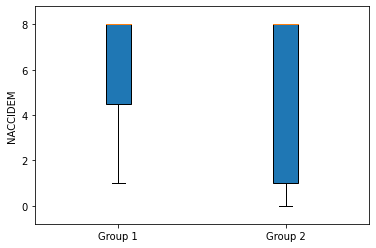

************************************************************************************************************************




Feature:  COGMODE


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=3.135435192339639, pvalue=0.07714233246501123)
Test: f_t, p_value_t -1.771E+00 7.714E-02
ANOVA: f, p_value: 3.135E+00 7.714E-02
--------------------------------------------------------------------------------


Group1:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1

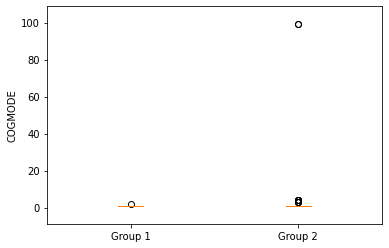

************************************************************************************************************************




Feature:  NPWBRWT


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=2.1253545735227566, pvalue=0.14542997921393994)
Test: f_t, p_value_t -2.186E+00 2.922E-02
ANOVA: f, p_value: 4.778E+00 2.922E-02
--------------------------------------------------------------------------------


Group1:  [1100 1360 1360 850 1440 1174 890 1160 1160 980 780 1100 1381 994 1150
 1120 1040 1200 1015 1194 661 1120 1086 1417 1370 940 1210 1430 1000 1200
 999 1080 866 1240 885 1246 1050 1066 1185 1250 1140 1330 1361 1030 1080
 864 941 1094 1160 1100 950 1100 1010 810 1040 1100 1040 1212 938 1360
 1066 1180 1280 1220 1370 988 1030 100 1030 1210 1475 994 831 1200 1240
 1387 1204 1340 1134 1250 950 1289 1210 1200 1310 1200 1200 1110 1400 1200
 1350 1090 1331 1072 1239 880 1088 990 1240 1110 1130 1046 1420 1180 1285
 1210 1404 

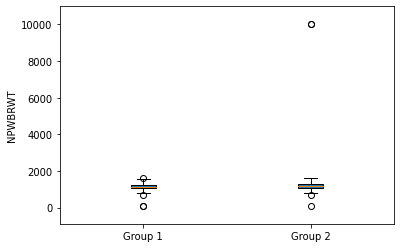

************************************************************************************************************************




Feature:  NACCDAGE


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=1.2324916106844703, pvalue=0.26739114146321485)
Test: f_t, p_value_t -1.630E+00 1.037E-01
ANOVA: f, p_value: 2.656E+00 1.037E-01
--------------------------------------------------------------------------------


Group1:  [89 61 81 69 85 95 65 83 84 80 59 85 65 85 72 73 41 76 64 78 71 94 73 69
 78 78 92 92 72 79 73 94 58 75 74 98 55 100 84 87 83 84 77 64 85 61 83 78
 55 84 72 70 84 63 75 70 94 72 87 76 68 92 43 63 88 85 82 65 78 83 64 62
 66 72 88 59 77 78 64 61 62 78 84 64 73 83 95 79 91 63 82 89 67 86 76 72
 54 64 78 73 67 72 82 97 71 78 85 81 86 79 79 85 71 89 65 96 85 66 63 80
 70 64 61 85 70 65 63 73 50 35 82 81 67 84 74 68 74 70 70 75 84 72 91 82
 74 81 65 72 77 85 96 82 101 67 92 82 86 69 69 74 64 88 69 65 81 39 87 77
 90 59 

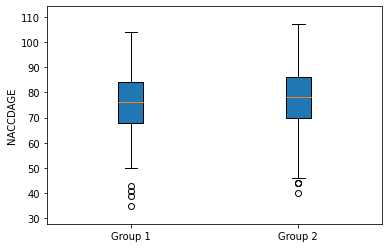

************************************************************************************************************************




Feature:  ORIENT


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=3.127374696380576, pvalue=0.07752244103484507)
Test: f_t, p_value_t 1.651E+01 2.380E-50
ANOVA: f, p_value: 2.727E+02 2.380E-50
--------------------------------------------------------------------------------


Group1:  [2.0 2.0 1.0 1.0 1.0 1.0 2.0 1.0 2.0 2.0 2.0 2.0 1.0 3.0 2.0 3.0 0.5 2.0
 3.0 2.0 2.0 1.0 1.0 3.0 3.0 3.0 3.0 2.0 2.0 1.0 2.0 2.0 3.0 2.0 2.0 2.0
 3.0 2.0 2.0 1.0 2.0 3.0 2.0 2.0 1.0 1.0 2.0 1.0 1.0 2.0 2.0 2.0 0.5 2.0
 2.0 1.0 1.0 1.0 2.0 1.0 1.0 2.0 3.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0
 2.0 2.0 2.0 2.0 0.5 2.0 2.0 1.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 1.0 3.0
 2.0 1.0 1.0 3.0 2.0 1.0 2.0 2.0 1.0 3.0 0.5 1.0 1.0 2.0 2.0 2.0 2.0 2.0
 2.0 3.0 2.0 2.0 3.0 1.0 2.0 3.0 2.0 2.0 1.0 2.0 1.0 2.0 2.0 2.0 3.0 3.0
 3.0 3.0 2.0 

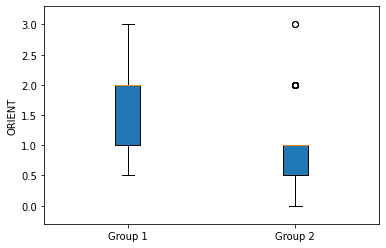

************************************************************************************************************************




Feature:  PERSCARE


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=8.18068155786232, pvalue=0.004389032807280778)
Test: f_t, p_value_t 1.077E+01 1.840E-24
ANOVA: f, p_value: 1.199E+02 1.840E-24
--------------------------------------------------------------------------------


Group1:  [1.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 1.0 3.0 2.0 1.0 2.0 3.0 2.0 2.0 2.0 2.0
 3.0 2.0 1.0 3.0 2.0 2.0 3.0 3.0 3.0 2.0 1.0 2.0 2.0 3.0 1.0 2.0 2.0 2.0
 3.0 3.0 3.0 3.0 3.0 3.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0 1.0 2.0 1.0 2.0 2.0
 1.0 2.0 1.0 3.0 2.0 2.0 2.0 1.0 3.0 1.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0
 2.0 0.0 2.0 3.0 2.0 2.0 3.0 1.0 2.0 2.0 2.0 2.0 3.0 3.0 1.0 1.0 0.0 3.0
 2.0 2.0 3.0 2.0 2.0 1.0 2.0 1.0 2.0 2.0 3.0 2.0 2.0 1.0 2.0 1.0 1.0 3.0
 1.0 3.0 2.0 0.0 2.0 2.0 2.0 3.0 1.0 1.0 2.0 1.0 2.0 3.0 1.0 3.0 2.0 3.0
 3.0 3.0 0.

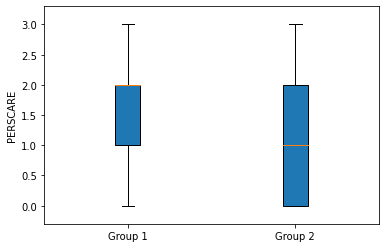

************************************************************************************************************************




Feature:  COGJUDG


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=7.721893491124303, pvalue=0.005635412943261621)
Test: f_t, p_value_t 2.474E+00 1.401E-02
ANOVA: f, p_value: 7.722E+00 1.401E-02
--------------------------------------------------------------------------------


Group1:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

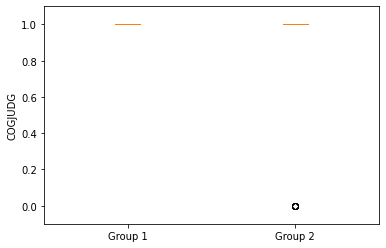

************************************************************************************************************************




Feature:  COMMUN


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=10.933258581838485, pvalue=0.0010039627807096538)
Test: f_t, p_value_t 1.614E+01 7.414E-48
ANOVA: f, p_value: 2.642E+02 7.414E-48
--------------------------------------------------------------------------------


Group1:  [2.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0 1.0 2.0 2.0 2.0
 3.0 2.0 2.0 2.0 1.0 3.0 2.0 3.0 3.0 1.0 1.0 2.0 2.0 2.0 3.0 2.0 2.0 1.0
 3.0 3.0 2.0 2.0 2.0 3.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0
 2.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0 1.0 3.0 2.0
 1.0 2.0 1.0 3.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 2.0 2.0 2.0 2.0
 3.0 1.0 2.0 3.0 2.0 2.0 3.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0
 2.0 3.0 2.0 2.0 3.0 2.0 2.0 3.0 2.0 1.0 2.0 2.0 2.0 3.0 2.0 2.0 2.0 3.0
 3.0 2.0 2

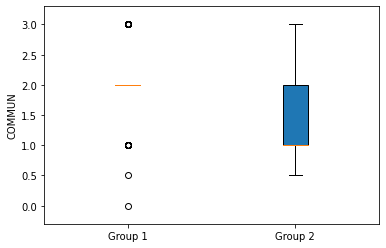

************************************************************************************************************************






In [5]:
group1_index=np.where(data_arr[:,-1]==True)[0]
group2_index=np.where(data_arr[:,-1]==False)[0]

for i in np.arange(used_number_features):
    feature_name=FS_data_used[i]
    
    print("Feature: ",feature_name)
    
    
    index_i=np.where(column_names_arr==feature_name)[0][0]
    get_data_i=data_arr[:,index_i]
    
    group1_data=get_data_i[group1_index]
    group2_data=get_data_i[group2_index]
    
    statistic_analysis(group1_data, group2_data)
    
    print("Group1: ",group1_data)
    print("\n")
    print("Group2: ",group2_data)
    print("\n")
    print("Mean: ",np.mean(group1_data),np.mean(group2_data))
    
    bar_figure(group1_data,group2_data,feature_name)
    
    print("*"*120)
    print("\n\n\n")